# **Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2 as cv
from google.colab.patches import cv2_imshow



from keras import layers, models
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, AveragePooling2D, BatchNormalization, Dropout, MaxPool2D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint

# **Data augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rescale=1./255, 
                              validation_split=0.2,
                              rotation_range=20,
                              width_shift_range=0.05,
                              height_shift_range=0.05,
                              horizontal_flip=True,
                              brightness_range = (0.5,0.8))
validation_gen = datagen.flow_from_directory("/content/drive/MyDrive/ASL/asl_alphabet_train/asl_alphabet_train/asl_alphabet_train", target_size=(64, 64), batch_size=64, subset="validation")
train_gen = datagen.flow_from_directory("/content/drive/MyDrive/ASL/asl_alphabet_train/asl_alphabet_train/asl_alphabet_train", target_size=(64, 64), batch_size=64, subset="training")

Found 17396 images belonging to 29 classes.
Found 69590 images belonging to 29 classes.


# **Images**

In [ ]:
for i in range(1,5):
    img, label = train_gen.next()
    plt.subplot(2,3,i)
    plt.imshow(img[0])
    plt.show()

# **CovNet**

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = [3,3]))
    
model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = [3,3]))
 
model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = [3,3]))
    
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(29, activation = 'softmax'))

model.summary()

# **VGG16**

In [ ]:
from keras.applications.vgg16 import VGG16
model = Sequential()
model.add(VGG16(weights="imagenet",input_shape=(64,64,3),include_top=False))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(29,activation="softmax"))

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 29)                7453      
                                                                 
Total params: 15,246,685
Trainable params: 15,246,685
Non-trainable params: 0
_________________________________________________________________


# **Training**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Modellek"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.load_weights("/content/drive/MyDrive/Modellek")

In [ ]:
model.fit(train_gen, epochs=50, validation_data=validation_gen, callbacks=[cp_callback], validation_steps = 50, steps_per_epoch = 64)
model.save("model.h5")

Epoch 1/50
64/64 [==============================] - ETA: 0s - loss: 0.2679 - accuracy: 0.9053 
Epoch 1: saving model to /content/drive/MyDrive/Modellek
64/64 [==============================] - 1897s 29s/step - loss: 0.2679 - accuracy: 0.9053 - val_loss: 0.5699 - val_accuracy: 0.8353
Epoch 2/50
64/64 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.9041 
Epoch 2: saving model to /content/drive/MyDrive/Modellek
64/64 [==============================] - 1675s 26s/step - loss: 0.2748 - accuracy: 0.9041 - val_loss: 0.6293 - val_accuracy: 0.8191
Epoch 3/50
64/64 [==============================] - ETA: 0s - loss: 0.2847 - accuracy: 0.9058 
Epoch 3: saving model to /content/drive/MyDrive/Modellek
64/64 [==============================] - 1494s 23s/step - loss: 0.2847 - accuracy: 0.9058 - val_loss: 0.5692 - val_accuracy: 0.8325
Epoch 4/50
64/64 [==============================] - ETA: 0s - loss: 0.2347 - accuracy: 0.9199 
Epoch 4: saving model to /content/drive/MyDrive/Model

KeyboardInterrupt: ignored

# **Testing**

In [ ]:
datagen = ImageDataGenerator( rescale=1./255, 
                              validation_split=0.01,
                              rotation_range=20,
                              width_shift_range=0.05,
                              height_shift_range=0.05,
                              horizontal_flip=True,
                              brightness_range = (0.5,0.8))
test_gen = datagen.flow_from_directory("/content/drive/MyDrive/ASL/asl_alphabet_train/asl_alphabet_train/asl_alphabet_train", target_size=(64, 64), batch_size=16, subset="validation")

Found 866 images belonging to 29 classes.


In [ ]:
loss, acc = model.evaluate(test_gen)
print("Loss: ", loss)
print("Accuracy: ", acc)

55/55 [==============================] - 33s 591ms/step - loss: 0.1664 - accuracy: 0.9434
Loss:  0.16639593243598938
Accuracy:  0.943418025970459


In [ ]:
predictions = model.predict(test_gen)

55/55 [==============================] - 29s 524ms/step


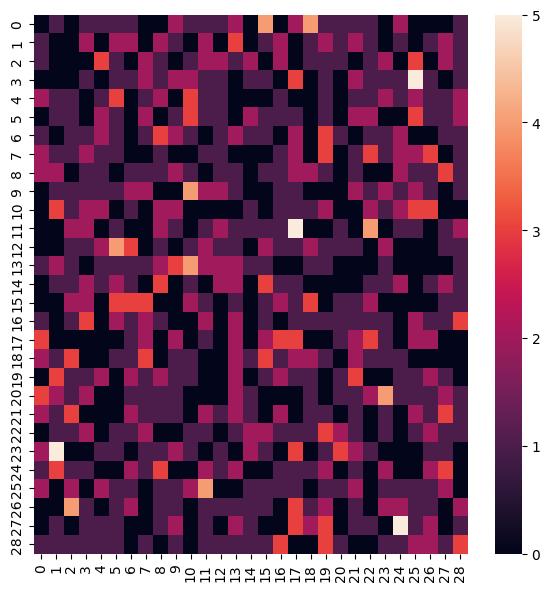

In [ ]:
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(test_gen.classes, predictions.argmax(axis=1)))
plt.show()

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)